# **Exploratory Data Analysis**

This notebook performs exploratory data analysis on the dataset prepared for the project **“VAR Impact on Home Advantage in Football”**. The primary objective is to investigate changes in home advantage indicators before and after the implementation of VAR across six different football leagues for seasons 2014–15 through 2024–25.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/main_merged_and_cleaned.csv")
df.head()

,id,team,country,league,season_start,season_end,final_league_pos,home_matches,home_wins,home_draws,...,home_yellow_cards_won,home_yellow_cards_conceded,home_red_cards_won,home_red_conceded,away_fouls_won_avg,away_fouls_conceded_avg,away_yellow_cards_won,away_yellow_cards_conceded,away_red_cards_won,away_red_cards_conceded
0,1,Hoffenheim,de,Bundesliga,2014,2015,8,17,9,3,...,25.294118,20.000000,2.352941,0.000000,181.176471,190.588235,19.411765,18.823529,1.176471,1.176471
1,2,Udinese,it,Serie A,2014,2015,16,19,6,5,...,25.789474,21.052632,0.526316,1.578947,136.842105,150.000000,20.526316,26.842105,2.105263,1.578947
2,3,Bayern Munich,de,Bundesliga,2014,2015,1,17,14,1,...,13.529412,6.470588,0.588235,1.176471,162.941177,140.000000,16.470588,15.294118,0.588235,0.000000
3,4,Augsburg,de,Bundesliga,2014,2015,5,17,9,4,...,24.705882,15.294118,0.588235,1.176471,150.000000,161.176471,18.235294,20.588235,1.764706,0.588235
4,5,Hellas Verona,it,Serie A,2014,2015,13,19,7,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Dataset Overview**

We begin by inspecting general characteristics of the merged dataset, including dimensions, column types, and missing values. This ensures the dataset is correctly structured for analysis.

*The dataset covers 1281 team-season observations across six leagues from 2014–2025. All core match outcome variables (wins, goals, points) are complete, while advanced metrics such as xG and referee-related variables (cards, fouls) contain missing values, mostly concentrated in seasons where those statistics were not recorded. This pattern is expected and does not indicate structural errors.*

* Basic Structure

In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1281 non-null   int64  
 1   team                        1281 non-null   object 
 2   country                     1281 non-null   object 
 3   league                      1281 non-null   object 
 4   season_start                1281 non-null   int64  
 5   season_end                  1281 non-null   int64  
 6   final_league_pos            1281 non-null   int64  
 7   home_matches                1281 non-null   int64  
 8   home_wins                   1281 non-null   int64  
 9   home_draws                  1281 non-null   int64  
 10  home_losses                 1281 non-null   int64  
 11  home_win_rate               1281 non-null   float64
 12  home_draw_rate              1281 non-null   float64
 13  home_loss_rate              1281 

(1281, 51)

* Summary Statistics

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1281.0,641.000000,369.937157,1.000000,321.000000,641.000000,961.000000,1281.000000
season_start,1281.0,2019.003903,3.156712,2014.000000,2016.000000,2019.000000,2022.000000,2024.000000
season_end,1281.0,2020.003903,3.156712,2015.000000,2017.000000,2020.000000,2023.000000,2025.000000
final_league_pos,1281.0,10.226386,5.634461,1.000000,5.000000,10.000000,15.000000,21.000000
home_matches,1281.0,18.373927,1.062092,13.000000,17.000000,19.000000,19.000000,20.000000
home_wins,1281.0,8.153005,3.391627,1.000000,6.000000,8.000000,10.000000,18.000000
home_draws,1281.0,4.618267,1.974512,0.000000,3.000000,4.000000,6.000000,11.000000
home_losses,1281.0,5.602654,2.946761,0.000000,4.000000,6.000000,7.000000,15.000000
home_win_rate,1281.0,0.444010,0.182847,0.052632,0.315789,0.421053,0.578947,0.947368
home_draw_rate,1281.0,0.251218,0.106109,0.000000,0.176471,0.250000,0.315789,0.588235


* Missing Values

In [4]:
df.isna().sum().sort_values(ascending=False)

,0
away_xg_avg,501
home_xg_avg,501
home_xg,501
away_xg,501
home_yellow_cards_won,400
home_fouls_conceded_avg,400
home_fouls_won_avg,400
home_yellow_cards_conceded,400
away_fouls_won_avg,400
home_red_conceded,400


**2. Exploratory Visualizations**

The following analyses explore trends in home-advantage indicators before and after VAR, both overall and across leagues. The implementation year for VAR varies by league; therefore, the analysis will consider a binary indicator (VAR_era) created from season boundaries.

* Create VAR Indicator

In [5]:
var_start = {
    "Bundesliga": 2017,
    "Serie A": 2017,
    "La Liga": 2018,
    "Premier League": 2019,
    "Ligue 1": 2018,
    "Süper Lig": 2018
}

df['VAR_era'] = df.apply(
    lambda x: 1 if x['season_start'] >= var_start.get(x['league'], 9999) else 0,
    axis=1
)

df['VAR_era'].value_counts()

,count
VAR_era,
1,835
0,446


* Home Win Rate: Pre-VAR vs Post-VAR

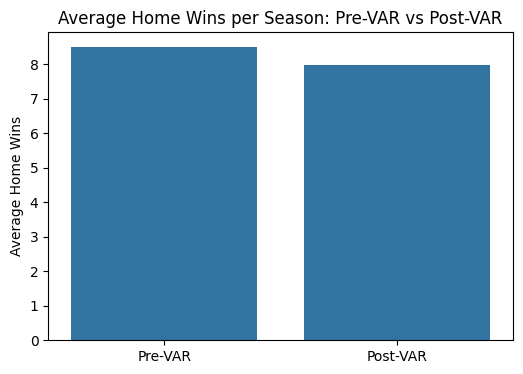

In [6]:
home_win_var = df.groupby('VAR_era')['home_wins'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=home_win_var, x='VAR_era', y='home_wins')
plt.xticks([0,1], ['Pre-VAR', 'Post-VAR'])
plt.title("Average Home Wins per Season: Pre-VAR vs Post-VAR")
plt.xlabel("")
plt.ylabel("Average Home Wins")
plt.show()

*Average home wins decline slightly after VAR implementation. The change is small, suggesting that VAR did not drastically alter overall home win frequency, but the direction of the shift aligns with the hypothesis that technological assistance may reduce home-referee bias.*

* League-Based Change in Home Advantage

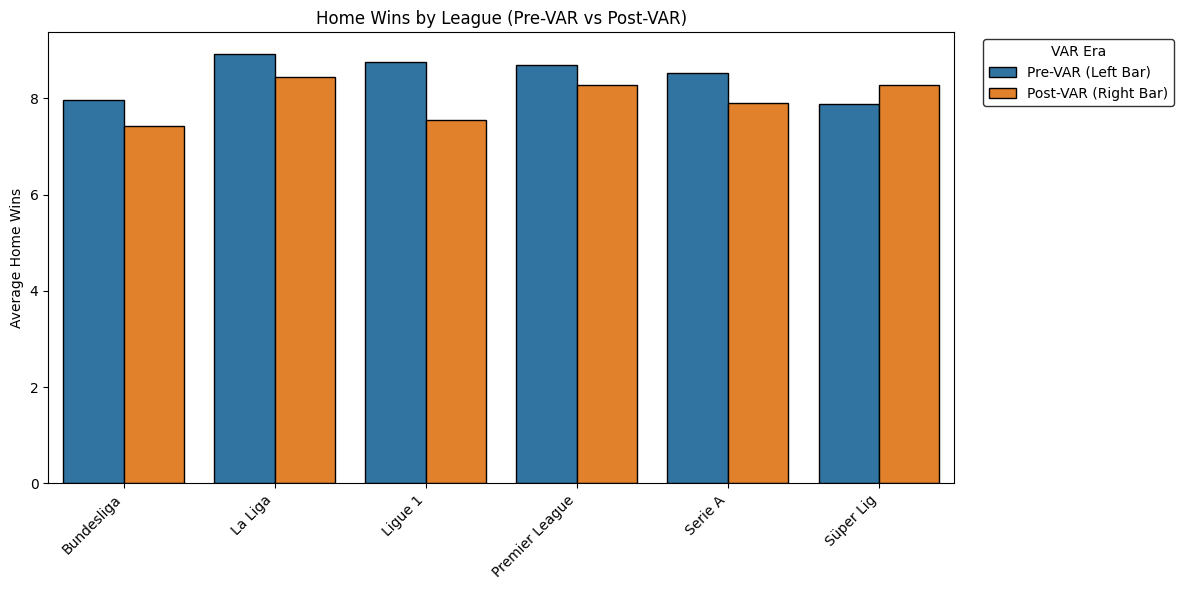

In [7]:
league_hw = df.groupby(['league', 'VAR_era'])['home_wins'].mean().reset_index()

plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=league_hw,
    x='league',
    y='home_wins',
    hue='VAR_era',
    palette=['#1f77b4', '#ff7f0e'],
    edgecolor="black"
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Home Wins")
plt.xlabel("")
plt.title("Home Wins by League (Pre-VAR vs Post-VAR)")

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles,
    ["Pre-VAR (Left Bar)", "Post-VAR (Right Bar)"],
    title="VAR Era",
    loc='upper right',
    bbox_to_anchor=(1.25, 1),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.show()

*Most leagues show a modest drop in home wins after VAR, though the magnitude varies. This indicates that the impact of VAR is not uniform across competitions. No league exhibits a strong increase in home wins post-VAR. Most differences appear small, suggesting league-specific contextual factors matter more than VAR alone.*

* Goals Scored at Home - Trend Over Seasons

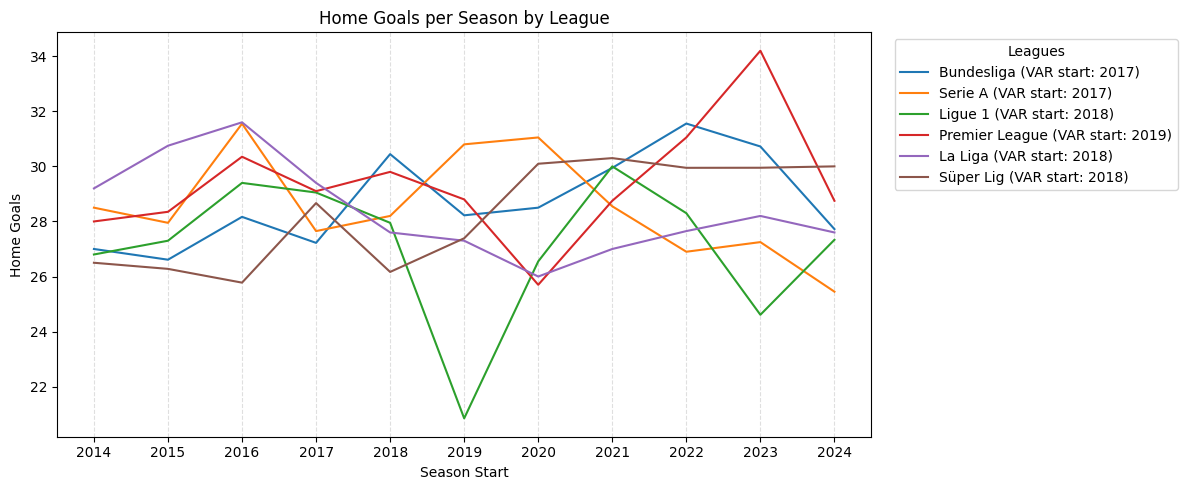

In [8]:
plt.figure(figsize=(12,5))

ax = sns.lineplot(
    data=df,
    x='season_start',
    y='home_goals_for',
    hue='league',
    errorbar=None
)

var_years = {
    "Bundesliga": 2017,
    "Serie A": 2017,
    "La Liga": 2018,
    "Premier League": 2019,
    "Ligue 1": 2018,
    "Süper Lig": 2018
}

handles, labels = ax.get_legend_handles_labels()

labels = [
    f"{lbl} (VAR start: {var_years.get(lbl)})"
    for lbl in labels
]

plt.legend(
    handles,
    labels,
    title="Leagues",
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.title("Home Goals per Season by League")
plt.xlabel("Season Start")
plt.ylabel("Home Goals")
plt.tight_layout()
years = range(df['season_start'].min(), df['season_start'].max() + 1)
plt.xticks(years)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


*Home goals fluctuate season to season without a clear structural break at each league’s VAR introduction point. The absence of a visible shift suggests that scoring patterns at home were not strongly altered by VAR. Variability is primarily driven by league-level dynamics rather than technology change.*

* Expected Goals (xG): Home vs Away Before and After VAR

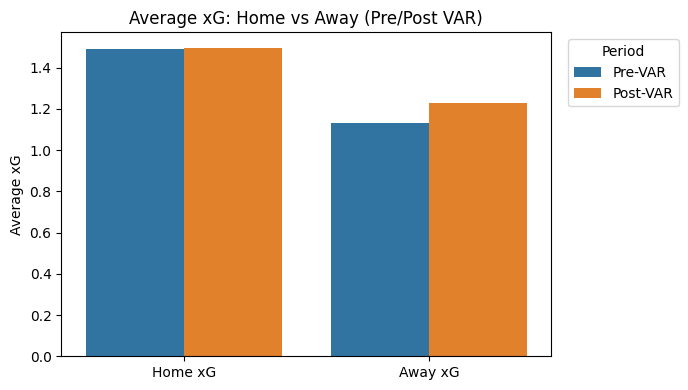

In [9]:
xg_compare = df.groupby('VAR_era')[['home_xg_avg','away_xg_avg']].mean().reset_index()
xg_compare['VAR_era'] = xg_compare['VAR_era'].map({0: 'Pre-VAR', 1: 'Post-VAR'})

xg_long = xg_compare.melt(id_vars='VAR_era',
                          value_vars=['home_xg_avg','away_xg_avg'],
                          var_name='Type',
                          value_name='xG')

xg_long['Type'] = xg_long['Type'].map({'home_xg_avg': 'Home xG', 'away_xg_avg': 'Away xG'})

plt.figure(figsize=(7,4))
sns.barplot(data=xg_long, x='Type', y='xG', hue='VAR_era', palette=['#1f77b4', '#ff7f0e'])
plt.title("Average xG: Home vs Away (Pre/Post VAR)")
plt.xlabel("")
plt.ylabel("Average xG")
plt.legend(title="Period", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

*Home xG levels are largely stable across eras, but away xG increases noticeably after VAR. This narrows the home–away xG gap and indicates that VAR reduces the ability of home teams to dominate chance quality. The shift suggests that VAR may strengthen the attacking effectiveness of away teams by providing more consistent and less location-dependent officiating.*

* Referee Decisions (Penalties, Fouls, Yellow Cards, Red Cards)

In [10]:
def plot_ref_metric(title, fav_col, against_col):

    # extract metric name from title (everything before the first "(" )
    metric_name = title.split("(")[0].strip()

    temp = df.groupby("VAR_era")[[fav_col, against_col]].mean()
    temp.index = ["Pre-VAR", "Post-VAR"]

    fav_pre = temp.loc["Pre-VAR", fav_col]
    fav_post = temp.loc["Post-VAR", fav_col]
    against_pre = temp.loc["Pre-VAR", against_col]
    against_post = temp.loc["Post-VAR", against_col]

    plot_df = pd.DataFrame({
        "Category": [
            "Home Fav. (Pre-VAR)",
            "Home Fav. (Post-VAR)",
            "Home Agst. (Pre-VAR)",
            "Home Agst. (Post-VAR)"
        ],
        "Value": [fav_pre, fav_post, against_pre, against_post]
    })

    plt.figure(figsize=(8,4))
    sns.barplot(data=plot_df, x="Category", y="Value")
    plt.title(title)
    plt.xlabel("")
    plt.ylabel(f"Average ({metric_name})")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

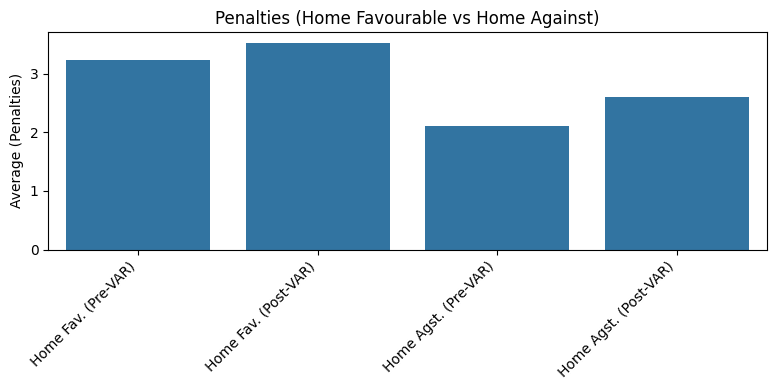

In [11]:
plot_ref_metric(
    "Penalties (Home Favourable vs Home Against)",
    "home_penalties_won",
    "home_penalties_conceded"
)

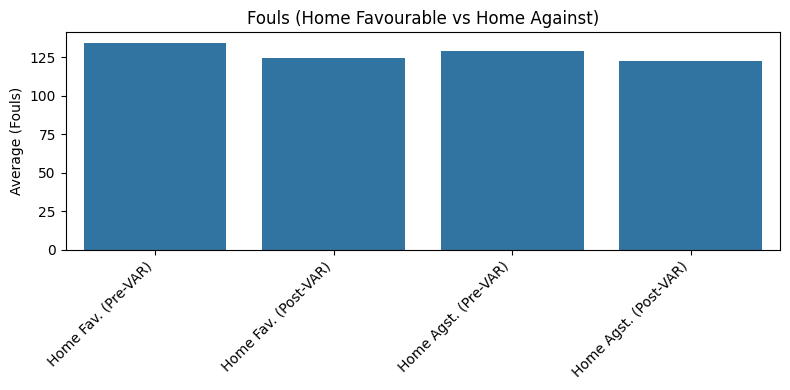

In [12]:
plot_ref_metric(
    "Fouls (Home Favourable vs Home Against)",
    "home_fouls_won_avg",
    "home_fouls_conceded_avg"
)

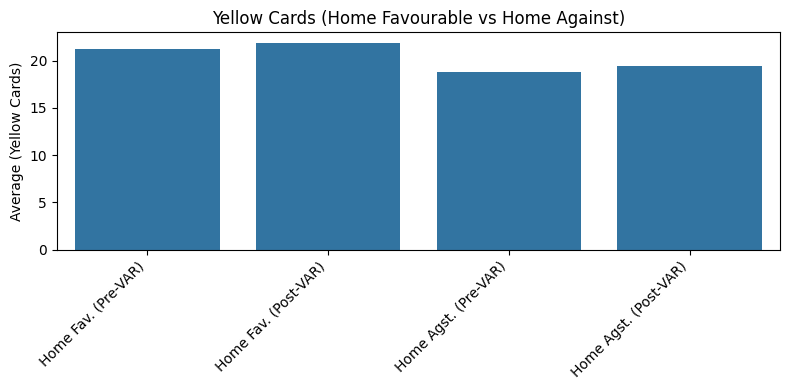

In [13]:
plot_ref_metric(
    "Yellow Cards (Home Favourable vs Home Against)",
    "home_yellow_cards_won",
    "home_yellow_cards_conceded"
)

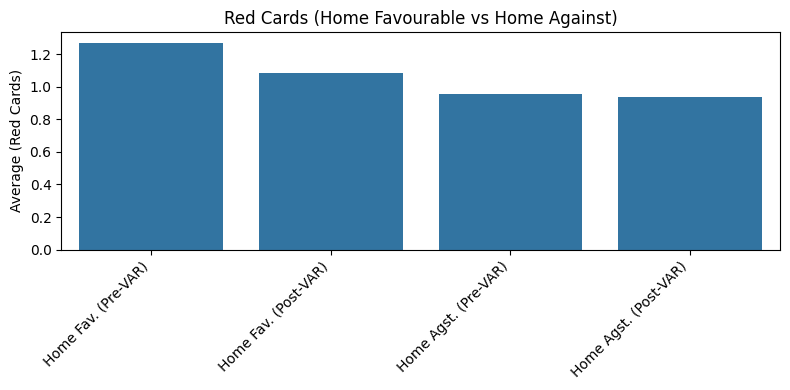

In [14]:
plot_ref_metric(
    "Red Cards (Home Favourable vs Home Against)",
    "home_red_cards_won",
    "home_red_conceded"
)

*Penalties*

*Home-favourable penalties rise slightly after VAR, while home-against penalties also increase. Because both directions change, the net shift does not clearly support stronger or weaker home advantage.*

*Fouls*

*Home fouls won and conceded show only minor differences pre- and post-VAR.*

*Cards*

*The net shift in yellow and red cards does not clearly indicate either stronger or weaker home advantage.*

**3. Home Advantage Index**

* Construct Home Advantage Index

In [15]:
cols_home_away = {
    'home_wins': 'away_wins',
    'home_points_per_match': 'away_points_per_match',
    'home_goals_for': 'away_goals_for',
    'home_goals_against': 'away_goals_against',
    'home_xg_avg': 'away_xg_avg',
    'home_fouls_won_avg': 'away_fouls_won_avg',
    'home_yellow_cards_won': 'away_yellow_cards_won',
    'home_red_cards_won': 'away_red_cards_won',
    'home_penalties_won': 'away_penalties_won',
    'home_penalties_conceded': 'away_penalties_conceded'
}

for h, a in cols_home_away.items():
    df[f"diff_{h}"] = df[h] - df[a]

diff_cols = [col for col in df.columns if col.startswith("diff_")]

df[diff_cols] = (df[diff_cols] - df[diff_cols].mean()) / df[diff_cols].std()

df['home_adv_index'] = df[diff_cols].mean(axis=1)

df[['team','season_start','season_end','home_adv_index']].head()

,team,season_start,season_end,home_adv_index
0,Hoffenheim,2014,2015,0.561469
1,Udinese,2014,2015,0.053602
2,Bayern Munich,2014,2015,-0.314162
3,Augsburg,2014,2015,0.631534
4,Hellas Verona,2014,2015,-0.091457


* Compare Index Before and After VAR

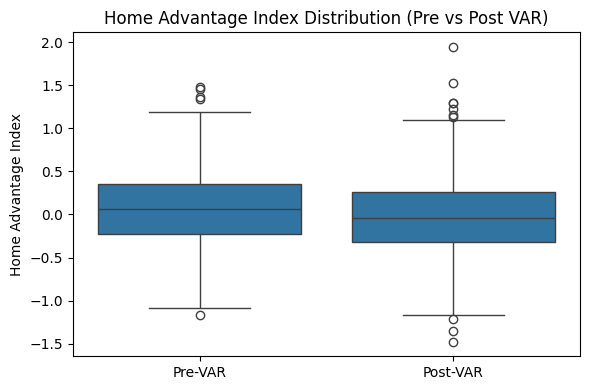

In [16]:
plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x='VAR_era',
    y='home_adv_index'
)

plt.xticks([0,1], ['Pre-VAR', 'Post-VAR'])
plt.title("Home Advantage Index Distribution (Pre vs Post VAR)")
plt.xlabel("")
plt.ylabel("Home Advantage Index")

plt.tight_layout()
plt.show()

*The distribution of the constructed home advantage index is similar before and after VAR. Median values are close, and variability remains comparable.*

* Home Advantage Index Over Time (Per League)

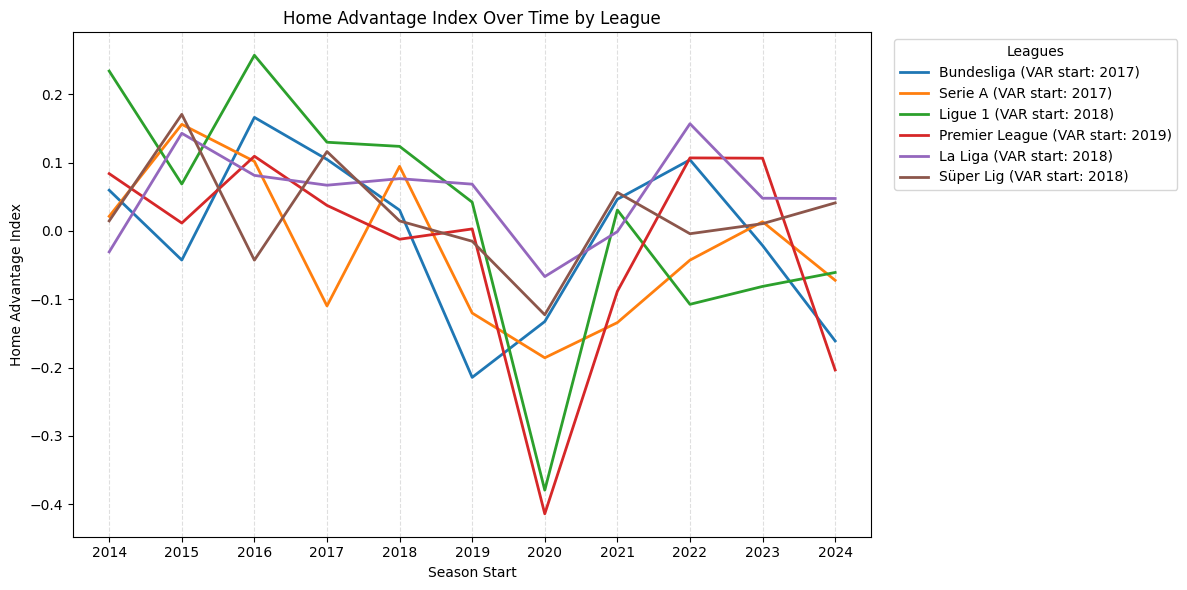

In [17]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(
    data=df,
    x='season_start',
    y='home_adv_index',
    hue='league',
    errorbar=None,
    linewidth=2
)

var_years = {
    "Bundesliga": 2017,
    "Serie A": 2017,
    "La Liga": 2018,
    "Premier League": 2019,
    "Ligue 1": 2018,
    "Süper Lig": 2018
}

handles, labels = ax.get_legend_handles_labels()

labels = [
    f"{lbl} (VAR start: {var_years.get(lbl)})"
    for lbl in labels
]

plt.legend(
    handles,
    labels,
    title="Leagues",
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.title("Home Advantage Index Over Time by League")
plt.xlabel("Season Start")
plt.ylabel("Home Advantage Index")
plt.tight_layout()
years = range(df['season_start'].min(), df['season_start'].max() + 1)
plt.xticks(years)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

*League trajectories of the home advantage index fluctuate from season to season without a consistent shift at each league’s VAR introduction point. Several leagues show a visible drop around 2020, which aligns with the COVID-19 period when matches were played without spectators. Apart from the pandemic-related dip, changes appear irregular and league-specific, indicating no clear long-term directional pattern linked to VAR alone.*

**4. Correlation with Final League Ranking**

* Correlation: Home Advantage Index vs Final Ranking

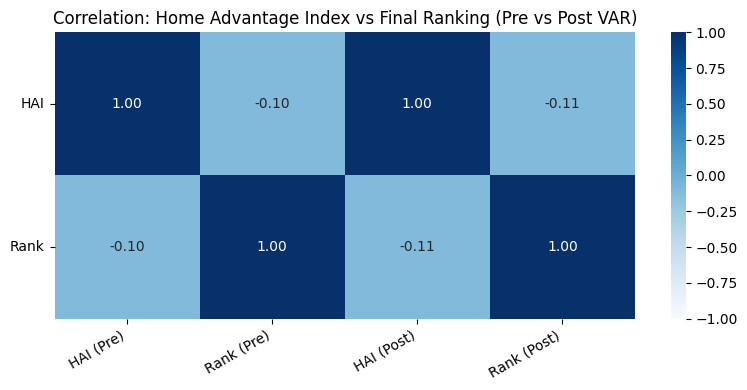

In [18]:
pre = df[df['VAR_era'] == 0]
post = df[df['VAR_era'] == 1]

pre_corr = pre[['home_adv_index', 'final_league_pos']].corr()
post_corr = post[['home_adv_index', 'final_league_pos']].corr()

pre_corr.columns = ["HAI (Pre)", "Rank (Pre)"]
pre_corr.index   = ["HAI", "Rank"]

post_corr.columns = ["HAI (Post)", "Rank (Post)"]
post_corr.index   = ["HAI", "Rank"]

combined_corr = pd.concat([pre_corr, post_corr], axis=1)

plt.figure(figsize=(8,4))
sns.heatmap(
    combined_corr,
    annot=True,
    cmap="Blues",
    vmin=-1,
    vmax=1,
    cbar=True,
    fmt=".2f"
)

plt.title("Correlation: Home Advantage Index vs Final Ranking (Pre vs Post VAR)")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

*Both before and after VAR, home advantage index has a weak negative correlation with final league position. Since lower ranking values indicate better performance, this means teams with slightly higher home advantage tend to finish marginally better—but the relationship is not substantially altered by VAR.*

* Correlation Plot: Effect Comparison Pre-VAR vs Post-VAR

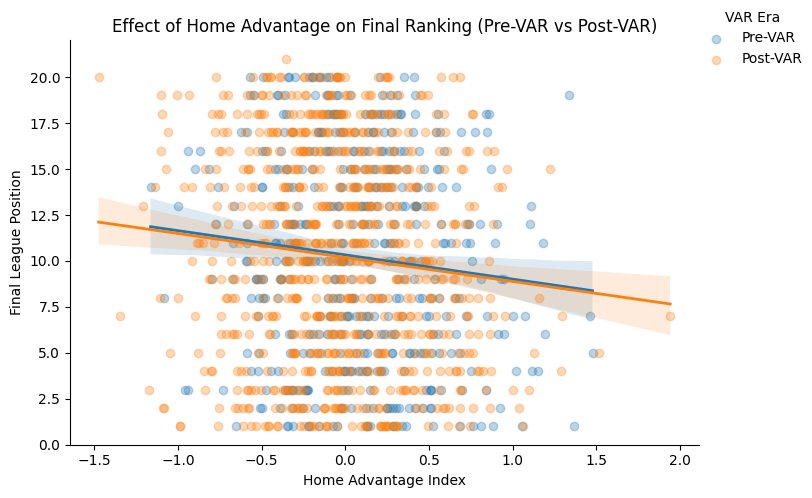

In [19]:
g = sns.lmplot(
    data=df,
    x='home_adv_index',
    y='final_league_pos',
    hue='VAR_era',
    height=5,
    aspect=1.3,
    scatter_kws={'alpha':0.3},
    line_kws={'linewidth':2}
)

# Fix legend labels
new_labels = ['Pre-VAR', 'Post-VAR']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Legend title
g._legend.set_title("VAR Era")

# Best legend position: slightly outside but not too far
g._legend.set_bbox_to_anchor((0.96, 1))
g._legend.set_loc("upper left")

plt.title("Effect of Home Advantage on Final Ranking (Pre-VAR vs Post-VAR)")
plt.xlabel("Home Advantage Index")
plt.ylabel("Final League Position")

plt.tight_layout()
plt.show()



*The slopes for Pre-VAR and Post-VAR are similar, and data points overlap heavily. Both eras show the same weak negative association.*

**5. Overall Summary:**

*Across all metrics-wins, goals, xG, disciplinary decisions, and the composite home advantage index-VAR does not produce strong, consistent shifts in home advantage. Changes that do occur are small and vary by league. The relationship between home advantage and final rankings also remains weak and stable across eras. Although there are small indications in some metrics that VAR may reduce home advantage, there is no clear or concrete evidence suggesting that it increases it, which does not challenge the hypothesis of the project.*